<h3>This is the 2nd of 3 Jupyter Notebooks </h3>

<h3>Tasks to Perform in this notebook</h3>
<ul>
<li><strong>Remove Sparse columns</strong></li> 
<li><strong>Remove outliers</strong></li>
<li><strong>Null Handle 1. Remove null rows, 2. Impute</strong></li>
<li><strong>PCA</strong></li>
<li><strong>* May Balance/Resample Dataset, May do in 3rd - Model Running Jupyter sheet after running some models without balancing first - undecided now</strong></li>
<li><strong>UPDATE >> We did resample and balancing in this notebook</strong></li>
<li><strong>UPDATE >> We did feature selection in this notebook</strong></li>
</ul>

# Running Instructions
### Run Cell -> Run All
### At the bottom of the sheet it should print "All cells compiled without error...."
### if all packages are installed, it should run without any error. It's better to use Anaconda. Or you can run in a 64bit python environment. Please do not run in 32 bit environment. Because of the large Dataset, some visualization will fail in 32 bit.
#### if it doesn't run properly, please run the individual cells that failed

#### Average time taken: 150 Seconds

In [0]:
# Start Python Imports 
import time
start_time = time.time()

import math, random, datetime
# Data Manipulation 
import numpy as np 
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt 
import missingno 
import seaborn as sns 
plt.style.use('seaborn-whitegrid')


# Part-1

In [0]:
df_train_1 = pd.read_csv('../raw_data/train.csv') 

In [0]:
# Insurance_History_5    |   25396    | 42.7678887186137
#    Family_Hist_2       |   28656    | 48.25786025833179
#    Family_Hist_3       |   34241    | 57.66322561088564
#    Family_Hist_4       |   19184    | 32.3066300668564
#    Family_Hist_5       |   41811    | 70.41141105740894
# Medical_History_10     |   58824    | 99.06198952526903
# Medical_History_15     |   44596    | 75.1014634310638
# Medical_History_24     |   55580    | 93.59896263114464
# Medical_History_32     |   58274    | 98.1357673329853

list_sparce_col = ['Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5',\
                   'Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
df_train_1.drop(list_sparce_col, axis=1, inplace=True)

# Remove null value rows
df_train_1.dropna(inplace = True)

                   Training Set Missing data analysis                    
-------------------------------------------------------------------------


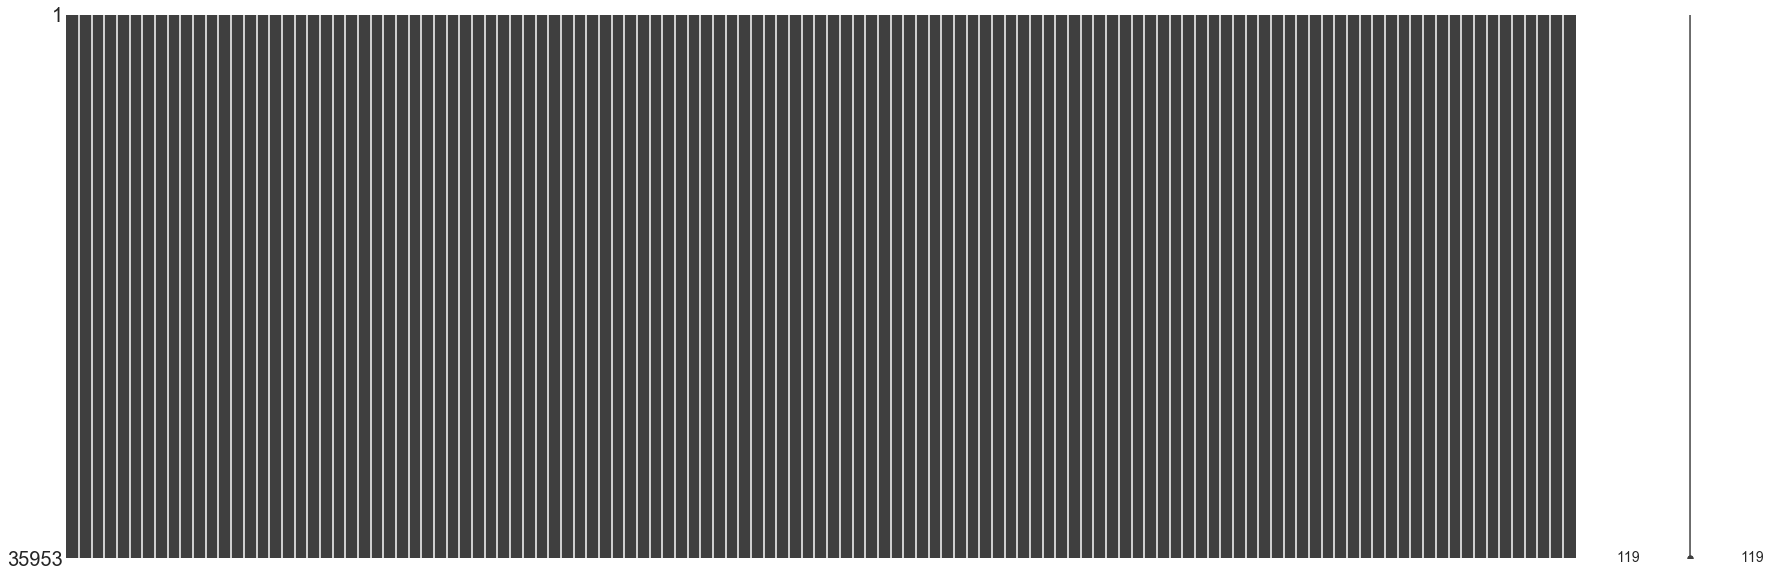

In [0]:
print("{:^73}".format("Training Set Missing data analysis") + '\n' + '-' * 73)
list_missing_train = []
for i, v in df_train_1.isnull().sum().items():
    if v != 0:
        pct_missing = (v/df_train_1.shape[0])*100
        print("{:^25} | {:^10} | {:^16}".format(i, v, pct_missing))
        list_missing_train.append((i,pct_missing))

        
# Plot graphic of missing values
missingno.matrix(df_train_1, figsize = (30,10))

In [0]:
# Remove Outliers

# Product_Info_4
df_train_1.drop(df_train_1[(df_train_1['Response'] == 1) & (df_train_1['Product_Info_4'] > 0.7)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 2) & (df_train_1['Product_Info_4'] > 0.58)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 3) & (df_train_1['Product_Info_4'] > 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 4) & (df_train_1['Product_Info_4'] > 0.58)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 5) & (df_train_1['Product_Info_4'] > 0.8)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 8) & (df_train_1['Product_Info_4'] > 0.82)].index, inplace=True)


# Ht
df_train_1.drop(df_train_1[(df_train_1['Response'] == 1) & (df_train_1['Ht'] > 0.9)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 1) & (df_train_1['Ht'] < 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 2) & (df_train_1['Ht'] > 0.9)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 2) & (df_train_1['Ht'] < 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 5) & (df_train_1['Ht'] < 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 6) & (df_train_1['Ht'] < 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 7) & (df_train_1['Ht'] < 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 8) & (df_train_1['Ht'] < 0.55)].index, inplace=True)


# Wt
df_train_1.drop(df_train_1[(df_train_1['Response'] == 1) & (df_train_1['Wt'] > 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 1) & (df_train_1['Wt'] < 0.1)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 2) & (df_train_1['Wt'] < 0.61)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 3) & (df_train_1['Wt'] > 0.55)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 4) & (df_train_1['Wt'] > 0.41)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 5) & (df_train_1['Wt'] < 0.6)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 6) & (df_train_1['Wt'] > 0.51)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 6) & (df_train_1['Wt'] < 0.11)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 7) & (df_train_1['Wt'] > 0.48)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 7) & (df_train_1['Wt'] < 0.11)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 8) & (df_train_1['Wt'] > 0.42)].index, inplace=True)


# BMI
df_train_1.drop(df_train_1[(df_train_1['Response'] == 1) & (df_train_1['BMI'] > 0.81)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 2) & (df_train_1['BMI'] > 0.9)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 4) & (df_train_1['BMI'] < 0.2)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 5) & (df_train_1['BMI'] > 0.88)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 5) & (df_train_1['BMI'] < 0.2)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 6) & (df_train_1['BMI'] > 0.78)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 6) & (df_train_1['BMI'] < 0.21)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 7) & (df_train_1['BMI'] > 0.5)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 7) & (df_train_1['BMI'] < 0.25)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 8) & (df_train_1['BMI'] > 0.6)].index, inplace=True)
df_train_1.drop(df_train_1[(df_train_1['Response'] == 8) & (df_train_1['BMI'] < 0.2)].index, inplace=True)


In [0]:
# introduce a new column - sum of medical_Keywords
df_train_1['Medical_Keyword_SUM'] = df_train_1.loc[:, 'Medical_Keyword_1':'Medical_Keyword_48'].sum(axis = 1, skipna = True)
# Drop all medical keyword columns
df_train_1.drop(df_train_1.columns.to_series()["Medical_Keyword_1":"Medical_Keyword_48"], axis=1, inplace=True)
df_train_1.shape

(23772, 72)

In [0]:
# Product_Info_2 is a non-numeric attribute....
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Product_Info_2 = df_train_1['Product_Info_2']
Product_Info_2_encoded = encoder.fit_transform(Product_Info_2)

# let's add this array to dataframe...
df_train_1['Product_Info_2_encoded'] = Product_Info_2_encoded

# drop Product_Info_2
df_train_1.drop('Product_Info_2', axis=1, inplace=True)
df_train_1.head(5)

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Response,Medical_Keyword_SUM,Product_Info_2_encoded
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,1,2,2,1,3,3,1,4,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,1,3,2,1,3,3,1,8,0,18
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,1,2,2,1,3,3,1,8,1,17
5,10,1,26,0.230769,3,1,1,0.507463,0.836364,0.299163,...,1,2,2,1,3,3,3,8,2,15
7,14,1,26,0.076923,2,3,1,0.611940,0.781818,0.403766,...,1,2,2,1,3,3,1,1,0,15


In [0]:
df_train_1.drop('Id', axis=1, inplace=True)
# Drop all sparse cols, drop all null rows, remove outliers, added sum column, removed medical keyword cols
df_train_1.to_csv('../partial_data/train_imbalanced_remove_col_outlier_dropNa.csv', index=False)

# Part 2

In [0]:
# # Drop all sparse cols, remove outliers, added sum column, removed medical keyword cols, encode product_info_2
# DON'T drop the null rows - IMPUTE-mean, mode, median, 

                   Training Set Missing data analysis                    
-------------------------------------------------------------------------
    Employment_Info_1     |     17     | 0.042343329680183325
    Employment_Info_4     |    4746    | 11.82126133306765
    Employment_Info_6     |    7644    | 19.039553651489488
    Medical_History_1     |    6320    | 15.74175550463286


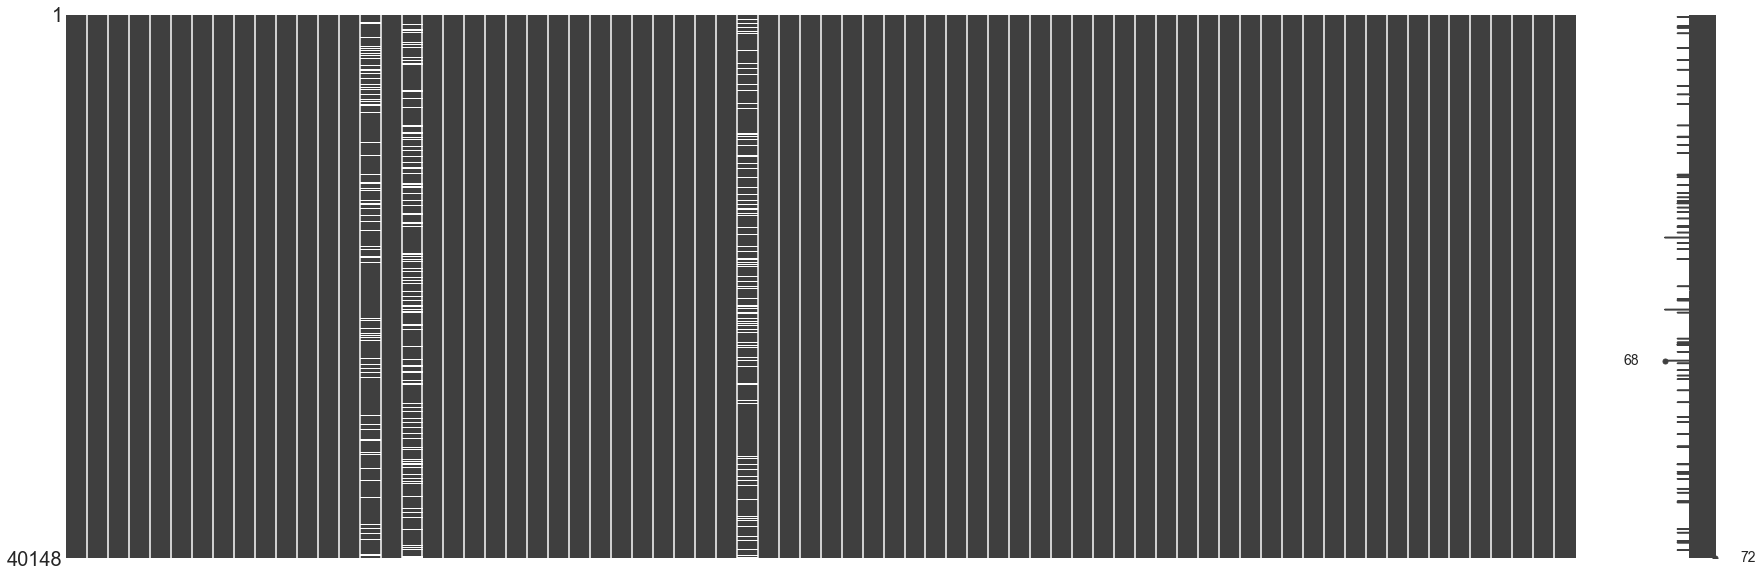

In [0]:
df_train_2 = pd.read_csv('../raw_data/train.csv') 
list_sparce_col = ['Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
df_train_2.drop(list_sparce_col, axis=1, inplace=True)


# Remove Outliers

# Product_Info_4
df_train_2.drop(df_train_2[(df_train_2['Response'] == 1) & (df_train_2['Product_Info_4'] > 0.7)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 2) & (df_train_2['Product_Info_4'] > 0.58)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 3) & (df_train_2['Product_Info_4'] > 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 4) & (df_train_2['Product_Info_4'] > 0.58)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 5) & (df_train_2['Product_Info_4'] > 0.8)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 8) & (df_train_2['Product_Info_4'] > 0.82)].index, inplace=True)


# Ht
df_train_2.drop(df_train_2[(df_train_2['Response'] == 1) & (df_train_2['Ht'] > 0.9)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 1) & (df_train_2['Ht'] < 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 2) & (df_train_2['Ht'] > 0.9)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 2) & (df_train_2['Ht'] < 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 5) & (df_train_2['Ht'] < 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 6) & (df_train_2['Ht'] < 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 7) & (df_train_2['Ht'] < 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 8) & (df_train_2['Ht'] < 0.55)].index, inplace=True)


# Wt
df_train_2.drop(df_train_2[(df_train_2['Response'] == 1) & (df_train_2['Wt'] > 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 1) & (df_train_2['Wt'] < 0.1)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 2) & (df_train_2['Wt'] < 0.61)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 3) & (df_train_2['Wt'] > 0.55)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 4) & (df_train_2['Wt'] > 0.41)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 5) & (df_train_2['Wt'] < 0.6)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 6) & (df_train_2['Wt'] > 0.51)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 6) & (df_train_2['Wt'] < 0.11)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 7) & (df_train_2['Wt'] > 0.48)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 7) & (df_train_2['Wt'] < 0.11)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 8) & (df_train_2['Wt'] > 0.42)].index, inplace=True)


# BMI
df_train_2.drop(df_train_2[(df_train_2['Response'] == 1) & (df_train_2['BMI'] > 0.81)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 2) & (df_train_2['BMI'] > 0.9)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 4) & (df_train_2['BMI'] < 0.2)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 5) & (df_train_2['BMI'] > 0.88)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 5) & (df_train_2['BMI'] < 0.2)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 6) & (df_train_2['BMI'] > 0.78)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 6) & (df_train_2['BMI'] < 0.21)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 7) & (df_train_2['BMI'] > 0.5)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 7) & (df_train_2['BMI'] < 0.25)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 8) & (df_train_2['BMI'] > 0.6)].index, inplace=True)
df_train_2.drop(df_train_2[(df_train_2['Response'] == 8) & (df_train_2['BMI'] < 0.2)].index, inplace=True)

# introduce a new column - sum of medical_Keywords, Drop all medical keyword columns
df_train_2['Medical_Keyword_SUM'] = df_train_2.loc[:, 'Medical_Keyword_1':'Medical_Keyword_48'].sum(axis = 1, skipna = True)
df_train_2.drop(df_train_2.columns.to_series()["Medical_Keyword_1":"Medical_Keyword_48"], axis=1, inplace=True)

# Product_Info_2 is a non-numeric attribute....
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Product_Info_2 = df_train_2['Product_Info_2']
Product_Info_2_encoded = encoder.fit_transform(Product_Info_2)

# let's add this array to dataframe...
df_train_2['Product_Info_2_encoded'] = Product_Info_2_encoded

# drop Product_Info_2
df_train_2.drop('Product_Info_2', axis=1, inplace=True)
df_train_2.head(5)

# Impute...before that let's visualize once..
print("{:^73}".format("Training Set Missing data analysis") + '\n' + '-' * 73)
list_missing_train = []
for i, v in df_train_2.isnull().sum().items():
    if v != 0:
        pct_missing = (v/df_train_2.shape[0])*100
        print("{:^25} | {:^10} | {:^16}".format(i, v, pct_missing))
        list_missing_train.append((i,pct_missing))
        

# Plot graphic of missing values
missingno.matrix(df_train_2, figsize = (30,10))

In [0]:
df_train_2_mean = df_train_2.fillna(df_train_2.mean())
df_train_2_median = df_train_2.fillna(df_train_2.median())

df_train_2_mean.drop('Id', axis=1, inplace=True)
df_train_2_mean.to_csv('../partial_data/train_imbalanced_remove_col_outlier_impute_mean.csv', index=False)

df_train_2_median.drop('Id', axis=1, inplace=True)
df_train_2_median.to_csv('../partial_data/train_imbalanced_remove_col_outlier_impute_median.csv', index=False)
df_train_2_median.shape

(40148, 71)

# Part 3

                   Training Set Missing data analysis                    
-------------------------------------------------------------------------
    Employment_Info_1     |     17     | 0.042343329680183325
    Employment_Info_4     |    4746    | 11.82126133306765
    Employment_Info_6     |    7644    | 19.039553651489488
    Medical_History_1     |    6320    | 15.74175550463286


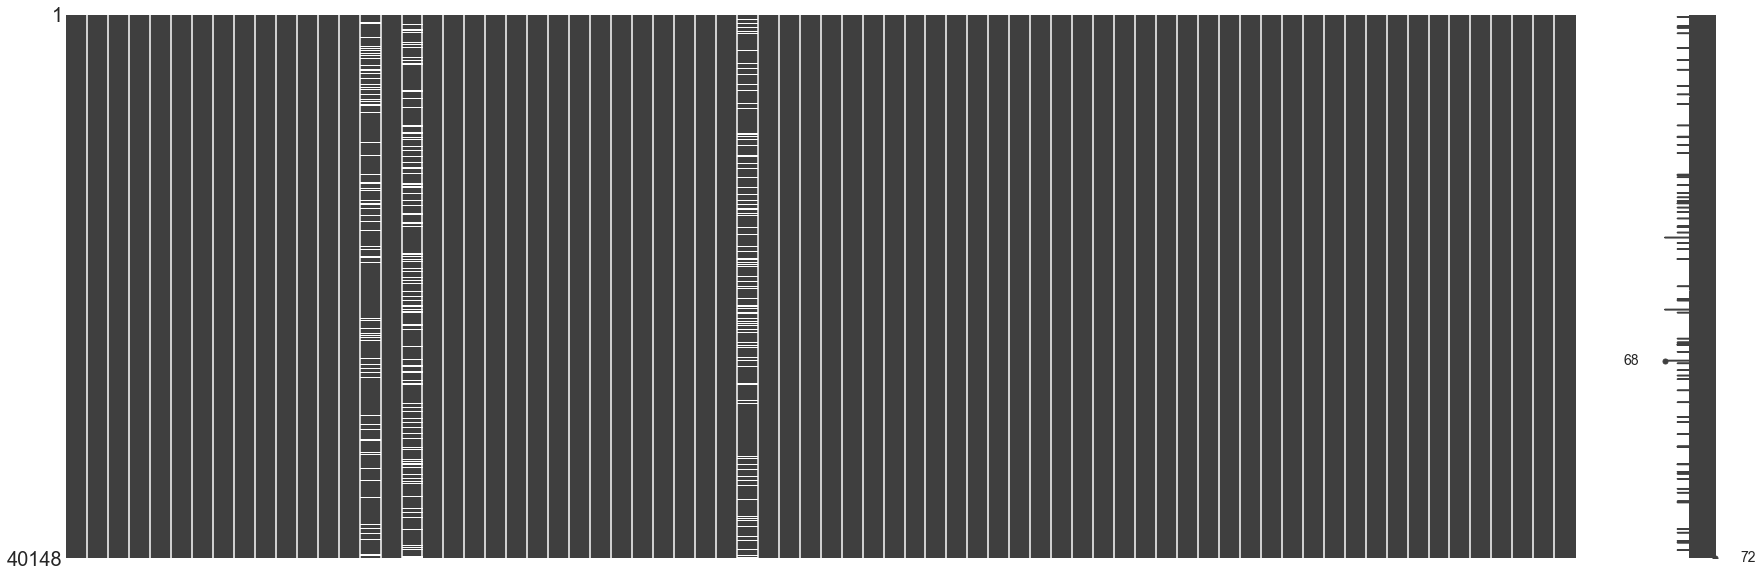

In [0]:
# All previous steps + PCA Wt, BMI 0.85 corr, Ins_Hist_1 vs 8 => 0.93 corr!!!

df_train_3 = pd.read_csv('../raw_data/train.csv') 
list_sparce_col = ['Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
df_train_3.drop(list_sparce_col, axis=1, inplace=True)

# Product_Info_4
df_train_3.drop(df_train_3[(df_train_3['Response'] == 1) & (df_train_3['Product_Info_4'] > 0.7)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 2) & (df_train_3['Product_Info_4'] > 0.58)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 3) & (df_train_3['Product_Info_4'] > 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 4) & (df_train_3['Product_Info_4'] > 0.58)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 5) & (df_train_3['Product_Info_4'] > 0.8)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 8) & (df_train_3['Product_Info_4'] > 0.82)].index, inplace=True)


# Ht
df_train_3.drop(df_train_3[(df_train_3['Response'] == 1) & (df_train_3['Ht'] > 0.9)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 1) & (df_train_3['Ht'] < 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 2) & (df_train_3['Ht'] > 0.9)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 2) & (df_train_3['Ht'] < 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 5) & (df_train_3['Ht'] < 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 6) & (df_train_3['Ht'] < 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 7) & (df_train_3['Ht'] < 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 8) & (df_train_3['Ht'] < 0.55)].index, inplace=True)


# Wt
df_train_3.drop(df_train_3[(df_train_3['Response'] == 1) & (df_train_3['Wt'] > 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 1) & (df_train_3['Wt'] < 0.1)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 2) & (df_train_3['Wt'] < 0.61)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 3) & (df_train_3['Wt'] > 0.55)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 4) & (df_train_3['Wt'] > 0.41)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 5) & (df_train_3['Wt'] < 0.6)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 6) & (df_train_3['Wt'] > 0.51)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 6) & (df_train_3['Wt'] < 0.11)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 7) & (df_train_3['Wt'] > 0.48)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 7) & (df_train_3['Wt'] < 0.11)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 8) & (df_train_3['Wt'] > 0.42)].index, inplace=True)


# BMI
df_train_3.drop(df_train_3[(df_train_3['Response'] == 1) & (df_train_3['BMI'] > 0.81)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 2) & (df_train_3['BMI'] > 0.9)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 4) & (df_train_3['BMI'] < 0.2)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 5) & (df_train_3['BMI'] > 0.88)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 5) & (df_train_3['BMI'] < 0.2)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 6) & (df_train_3['BMI'] > 0.78)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 6) & (df_train_3['BMI'] < 0.21)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 7) & (df_train_3['BMI'] > 0.5)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 7) & (df_train_3['BMI'] < 0.25)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 8) & (df_train_3['BMI'] > 0.6)].index, inplace=True)
df_train_3.drop(df_train_3[(df_train_3['Response'] == 8) & (df_train_3['BMI'] < 0.2)].index, inplace=True)


df_train_3['Medical_Keyword_SUM'] = df_train_3.loc[:, 'Medical_Keyword_1':'Medical_Keyword_48'].sum(axis = 1, skipna = True)
df_train_3.drop(df_train_3.columns.to_series()["Medical_Keyword_1":"Medical_Keyword_48"], axis=1, inplace=True)

# Product_Info_2 is a non-numeric attribute....
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Product_Info_2 = df_train_3['Product_Info_2']
Product_Info_2_encoded = encoder.fit_transform(Product_Info_2)

# let's add this array to dataframe...
df_train_3['Product_Info_2_encoded'] = Product_Info_2_encoded

# drop Product_Info_2
df_train_3.drop('Product_Info_2', axis=1, inplace=True)
df_train_3.head(5)

# Impute...before that let's visualize once..
print("{:^73}".format("Training Set Missing data analysis") + '\n' + '-' * 73)
list_missing_train = []
for i, v in df_train_3.isnull().sum().items():
    if v != 0:
        pct_missing = (v/df_train_3.shape[0])*100
        print("{:^25} | {:^10} | {:^16}".format(i, v, pct_missing))
        list_missing_train.append((i,pct_missing))
        

# Plot graphic of missing values
missingno.matrix(df_train_3, figsize = (30,10))

In [0]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_3[['Wt','BMI']])
df_train_3[['Wt_BMI_PCA1','Wt_BMI_PCA2']] = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_3[['Insurance_History_1','Insurance_History_8']])
df_train_3[['Ins_Hist_PCA1','Ins_Hist_PCA2']] = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_train_3.describe()
# Wt_BMI_PCA1 has higher std div 0.119134...take that..
# Ins_Hist_PCA1 has higher std div 0.842303...take that..


,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_History_39,Medical_History_40,Medical_History_41,Response,Medical_Keyword_SUM,Product_Info_2_encoded,Wt_BMI_PCA1,Wt_BMI_PCA2,Ins_Hist_PCA1,Ins_Hist_PCA2
count,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,...,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,40148.000000,27088.000000,27088.000000,27088.000000,27088.000000
mean,39574.735553,1.027722,24.327538,0.298852,2.006526,2.673757,1.042866,0.402582,0.706318,0.274943,...,2.863405,2.967520,1.637616,6.139185,1.166085,12.455340,0.000230,-0.000214,0.003091,0.000782
std,22810.854571,0.164178,5.200632,0.229316,0.080520,0.738962,0.289607,0.198037,0.071537,0.076060,...,0.504468,0.252698,0.932027,2.330022,1.410833,5.509905,0.119134,0.034529,0.842303,0.246567
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.509091,0.092050,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.310316,-0.148161,-0.977827,-0.725864
25%,19844.750000,1.000000,26.000000,0.092308,2.000000,3.000000,1.000000,0.238806,0.654545,0.215481,...,3.000000,3.000000,1.000000,6.000000,0.000000,7.000000,-0.084278,-0.024633,-0.977827,-0.262488
50%,39514.500000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.267782,...,3.000000,3.000000,1.000000,7.000000,1.000000,15.000000,-0.008006,-0.001764,-0.091665,0.160297
75%,59336.250000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.320084,...,3.000000,3.000000,3.000000,8.000000,2.000000,16.000000,0.068394,0.022419,1.257873,0.200888
max,79145.000000,2.000000,37.000000,1.000000,3.000000,3.000000,3.000000,1.000000,0.981818,0.686192,...,3.000000,3.000000,3.000000,8.000000,16.000000,18.000000,0.600455,0.159884,1.257873,1.087050


In [0]:
df_train_3.drop(['Wt_BMI_PCA2', 'Wt', 'BMI'], axis=1, inplace=True)
df_train_3.drop(['Ins_Hist_PCA2', 'Insurance_History_1', 'Insurance_History_8'], axis=1, inplace=True)

In [0]:
df_train_3_mean = df_train_3.fillna(df_train_3.mean())
df_train_3_median = df_train_3.fillna(df_train_3.median())

df_train_3_mean.drop('Id', axis=1, inplace=True)
df_train_3_mean.to_csv('../partial_data/train_imbalanced_remove_col_outlier_impute_mean_PCA.csv', index=False)

df_train_3_median.drop('Id', axis=1, inplace=True)
df_train_3_median.to_csv('../partial_data/train_imbalanced_remove_col_outlier_impute_median_PCA.csv', index=False)
df_train_3_median.shape

(40148, 69)

Checking ../partial_data/train_balanced_remove_col.csv
7    1013
3    1013
6    1013
2    1013
5    1013
1    1013
8    1013
4    1013
Name: Response, dtype: int64


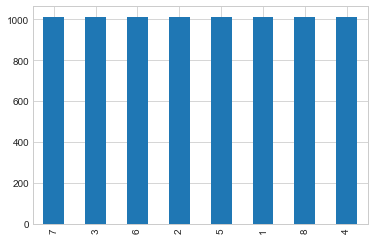

Checking ../partial_data/train_balanced_remove_col_impute_mean.csv
7    1013
3    1013
6    1013
2    1013
5    1013
1    1013
8    1013
4    1013
Name: Response, dtype: int64


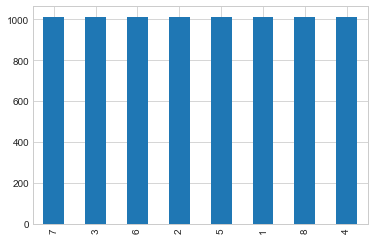

Checking ../partial_data/train_balanced_remove_col_impute_mean_PCA.csv
7    1013
3    1013
6    1013
2    1013
5    1013
1    1013
8    1013
4    1013
Name: Response, dtype: int64


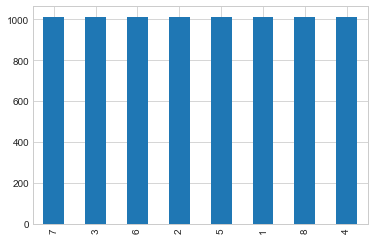

Checking ../partial_data/train_imbalanced_remove_col_outlier_dropNa.csv
8    9482
6    6644
1    3271
7    3175
4     672
3     495
2      29
5       4
Name: Response, dtype: int64


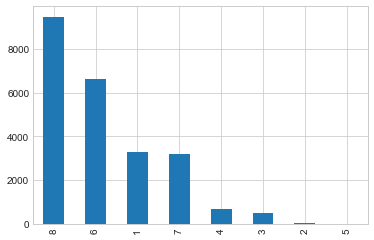

Checking ../partial_data/train_imbalanced_remove_col_outlier_impute_mean.csv
8    16458
6    11068
1     5342
7     4987
4     1303
3      940
2       43
5        7
Name: Response, dtype: int64


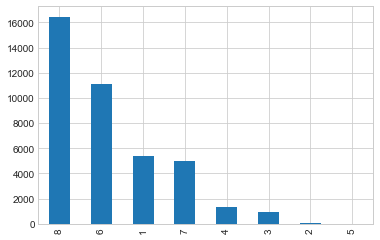

Checking ../partial_data/train_imbalanced_remove_col_outlier_impute_mean_PCA.csv
8    16458
6    11068
1     5342
7     4987
4     1303
3      940
2       43
5        7
Name: Response, dtype: int64


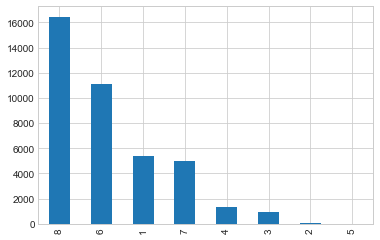

Checking ../partial_data/train_imbalanced_remove_col_outlier_impute_median.csv
8    16458
6    11068
1     5342
7     4987
4     1303
3      940
2       43
5        7
Name: Response, dtype: int64


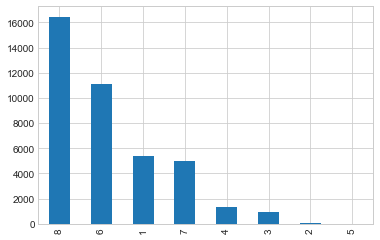

Checking ../partial_data/train_imbalanced_remove_col_outlier_impute_median_PCA.csv
8    16458
6    11068
1     5342
7     4987
4     1303
3      940
2       43
5        7
Name: Response, dtype: int64


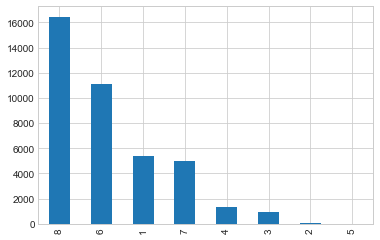

In [0]:
# Start creating Balanced Datasets from newly generated csv files...
# but first, check the current response ratio for each set

from os import listdir
from os.path import isfile, join

newFilepath = '../partial_data'
newfiles = [f for f in listdir(newFilepath) if isfile(join(newFilepath, f))]

for file in newfiles:
    absolute_filePath = newFilepath + '/' + file
    print(f'Checking {absolute_filePath}')
    df = pd.read_csv(absolute_filePath) 
    print(df.Response.value_counts())
    df.Response.value_counts().plot(kind="bar")
    plt.show()


In [0]:
# some common functions to visualize categorical and continuous variables

def corrHeatMap(df, title):
    f, ax = plt.subplots(figsize=(10, 6))
    corr = df.corr()
    hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                     linewidths=.05)
    f.subplots_adjust(top=0.93)
    t= f.suptitle(title, fontsize=14)
    plt.show()
    

def pairplot(df, title):
    pp = sns.pairplot(df.fillna(df.mean()), height=1.8, aspect=1.8,
                      plot_kws=dict(edgecolor="k", linewidth=0.5),
                      diag_kind="kde", diag_kws=dict(shade=True))

    fig = pp.fig 
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle(title, fontsize=14)
    plt.show()

def check_categorical_data_distribution(df, col):
    # Let's have a look how many types of values is there 
    list_unique_values = sorted(df[col].unique())
    print(f'Unique values: {list_unique_values}')
    
    dict_values = {}
    dict_values_pct = {}
    for i in list_unique_values:
        dict_values[i] = df[df[col] == i][col].count()
        dict_values_pct[i] = str(round(df[df[col] == i][col].count()*100/df_train.shape[0], 4)) + ' %'
        
    print(f'count of uniques values {dict_values}')
    print(f'Percentage of unique values {dict_values_pct}')
    
    plt.bar(range(len(dict_values)), list(dict_values.values()), align='center')
    plt.xticks(range(len(dict_values)), list(dict_values.keys()))
    plt.show()

    
def cat_data_distr_forEachValue(df, col, figsize = (8,4)):    
    list_unique_response = sorted(df_train.Response.unique())
    list_prod_info_values = sorted(df[col].unique())
    dict_prod_info_count = {}
    for resp in list_unique_response:
        list_resp_count = []
        for prod_info in list_prod_info_values:
            count_prodInfo_resp = df[(df[col] == prod_info) & (df['Response'] == resp)][col].count()
            list_resp_count.append(count_prodInfo_resp)
        dict_prod_info_count[resp] = list_resp_count

#     print(dict_resp_count)
    df_to_plot = pd.DataFrame.from_dict(dict_prod_info_count)
    df_to_plot
    df_to_plot.plot.bar(figsize = figsize)
    plt.show()
    

# plot continuous variables-response and response-variable side by side
def plot_cont_var_response(v1, x, v2, y):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    f.suptitle(f'{v1} - Response', fontsize=14)
    
    ax1.scatter(x, y)
    ax1.set_title(f'{v1} - {v2}')
    ax1.set(xlabel=v1, ylabel=v2)

    ax2.scatter(y, x)
    ax2.set_title(f'{v2} - {v1}')
    ax2.set(xlabel=v2, ylabel=v1)

    fig = plt.gcf()
    fig.set_size_inches(18, 6)
    plt.show()    
    
# plot boxplot, swarmplot, violinplot
def plot_continuous_variable(plot_type, df, col):
    f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
    f.suptitle(f'Response - {col}', fontsize=14)
    
    if plot_type == 'violinplot':
        sns.violinplot(x="Response", y=col, data=df,  ax=ax)
    elif plot_type == 'boxplot':
        sns.boxplot(x="Response", y=col, data=df,  ax=ax)
    elif plot_type == 'swarmplot':
        sns.swarmplot(x="Response", y=col, data=df,  ax=ax)
        
    ax.set_xlabel("Response",size = 12,alpha=0.8)
    ax.set_ylabel(f'{col}',size = 12,alpha=0.8)
    plt.show()


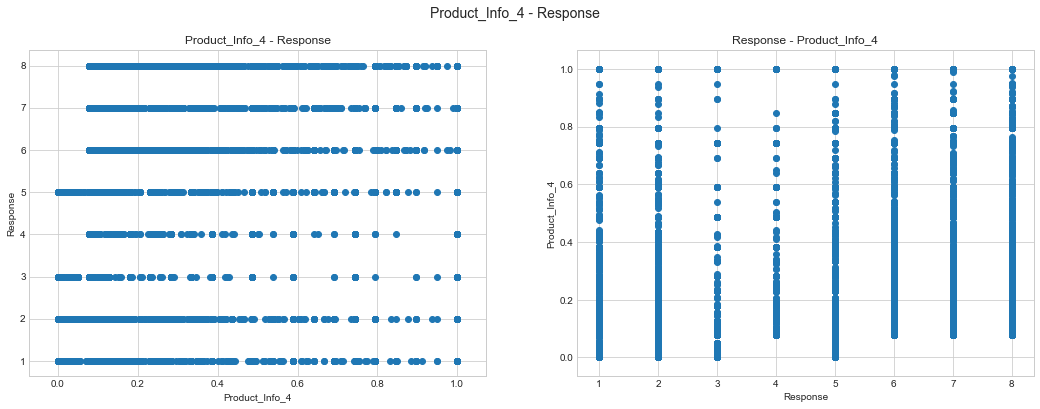

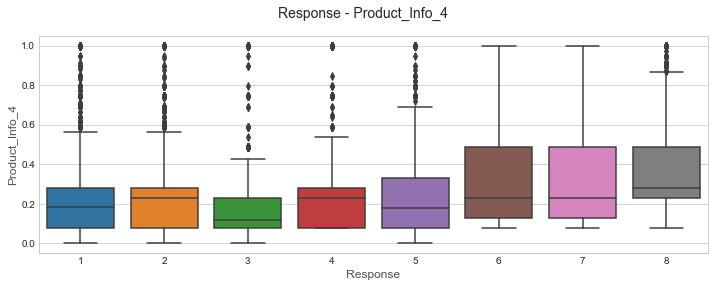

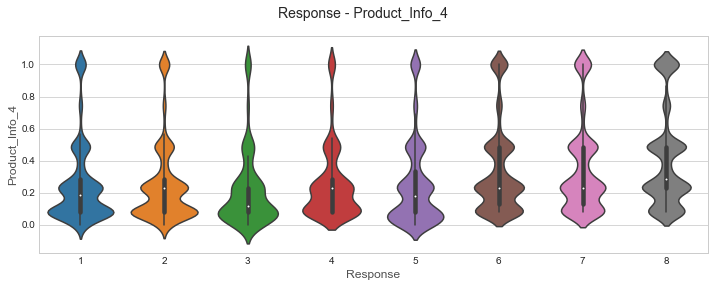

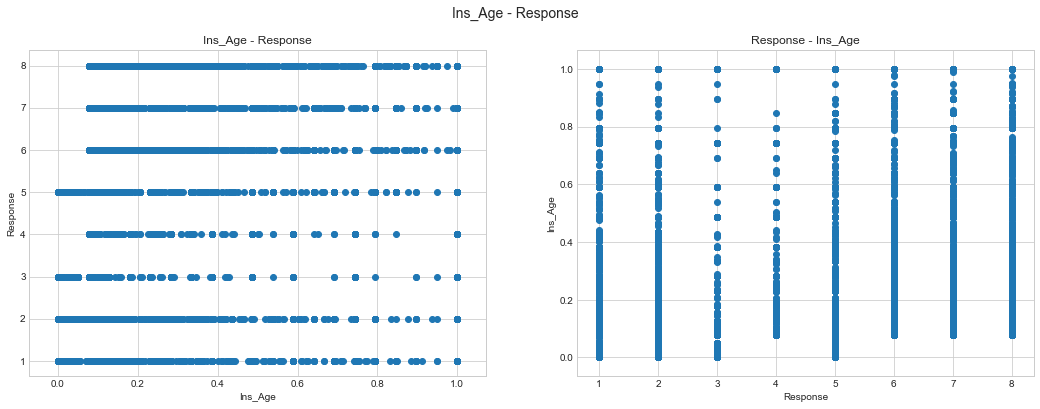

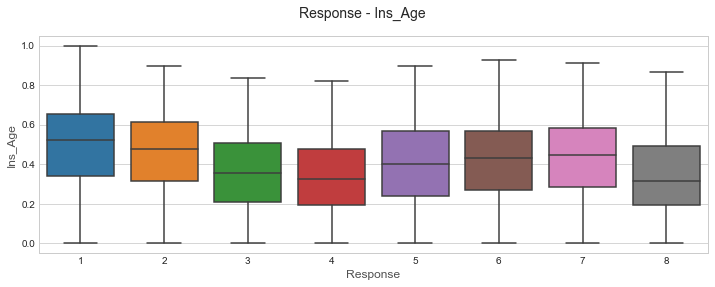

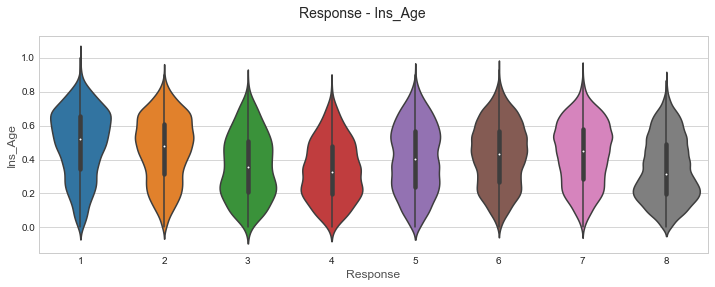

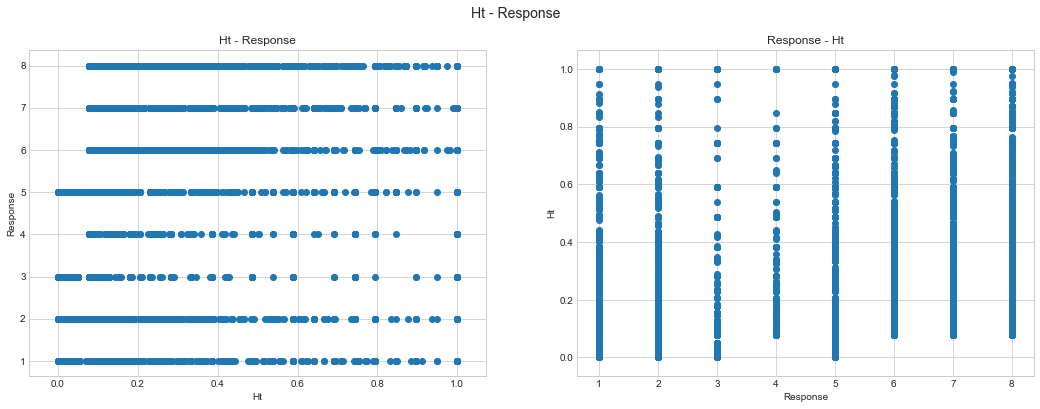

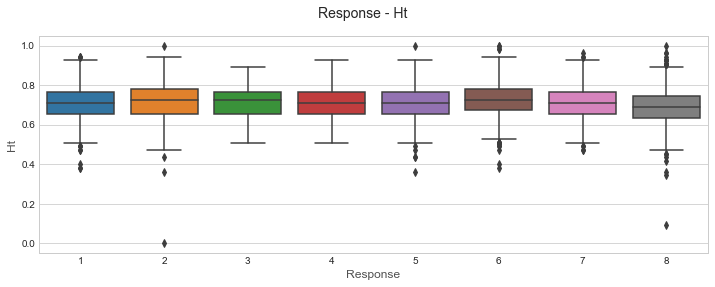

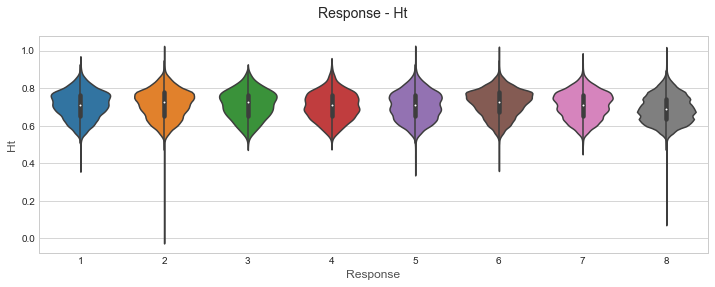

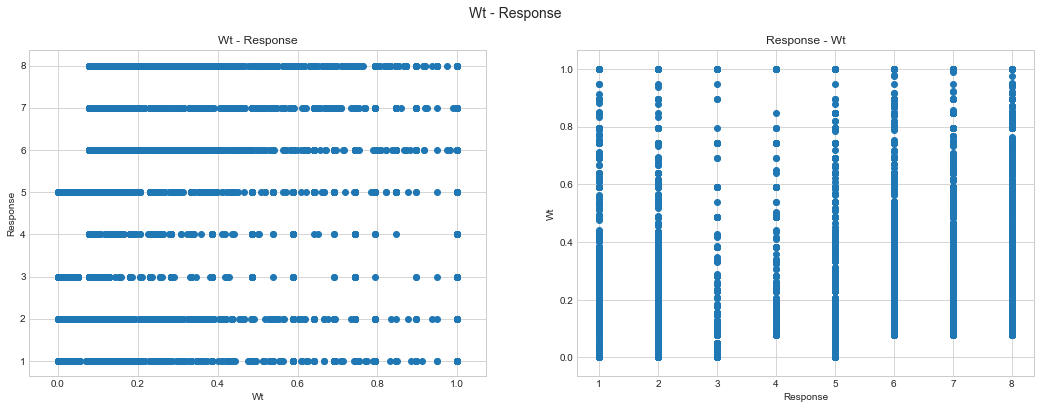

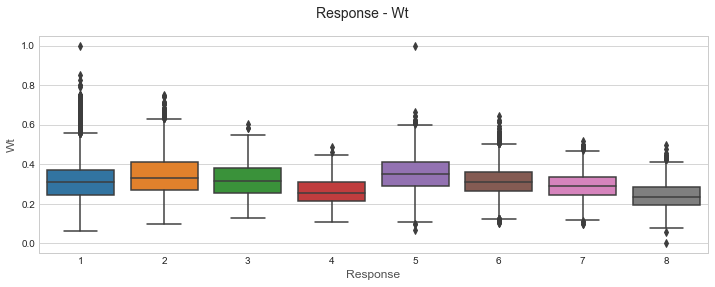

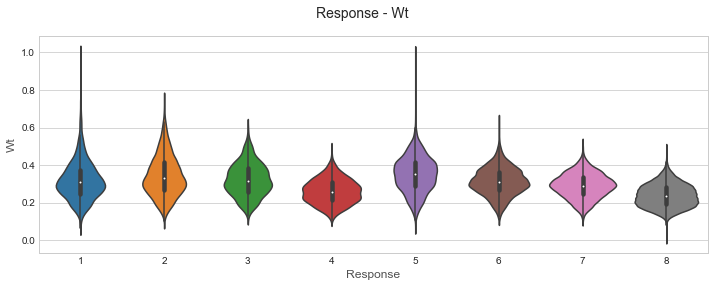

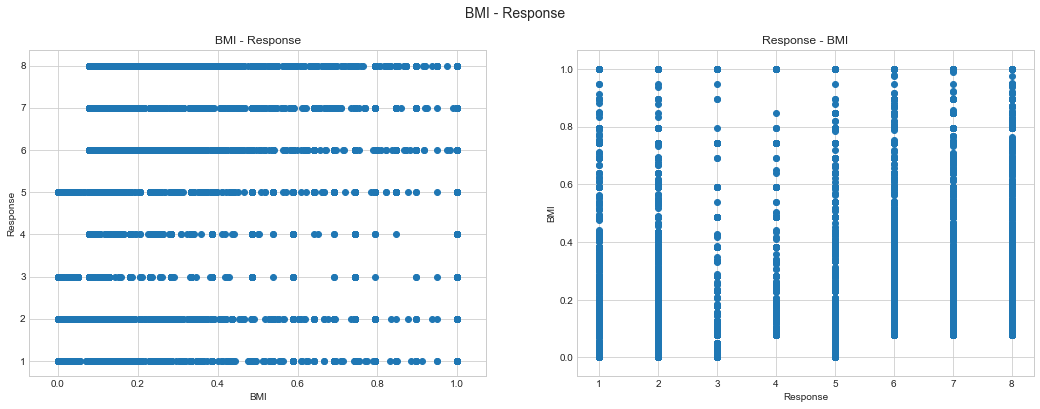

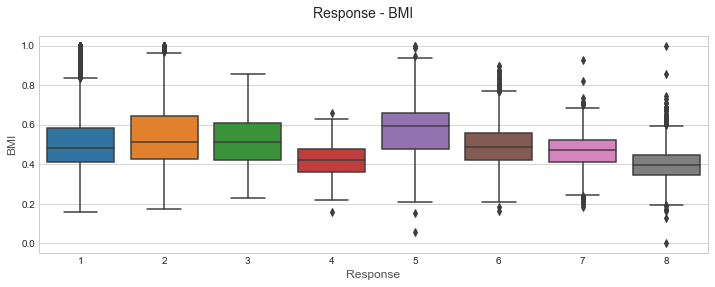

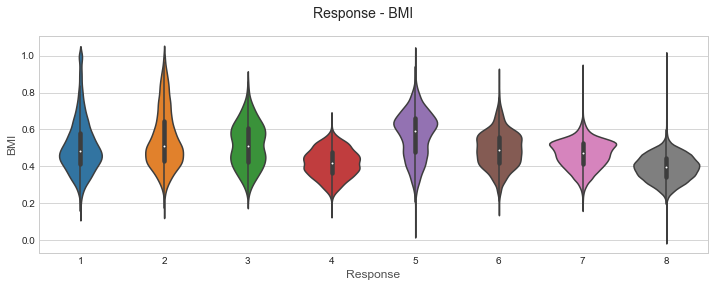

In [0]:
# So Response 2 and 5 has been reduced by a lot...
# what caused it? Let's go back to oroginal data and see what type of data is there for 5 and 2 

# we removed outliers for Product_Info_4, Ins_Age, Ht, Wt, BMI..this caused the data reduction

# may be visualization of these features against Response 5 and 2 can give us an idea....

df_check = pd.read_csv('../raw_data/train.csv')

list_continous_variables = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI']

for col in list_continous_variables:
    plot_cont_var_response(col, df_check.Product_Info_4, 'Response', df_check.Response)
    plot_continuous_variable('boxplot', df_check, col)
    plot_continuous_variable('violinplot', df_check, col)


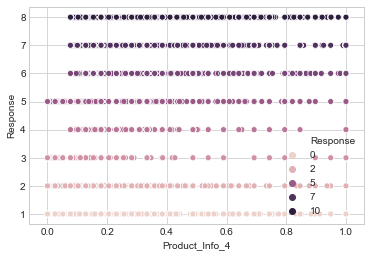

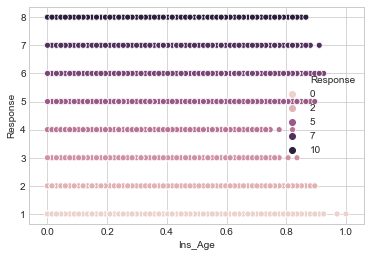

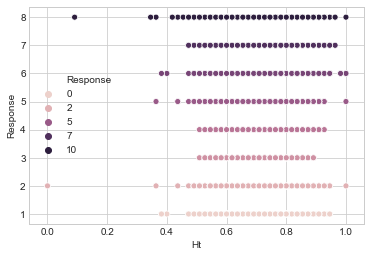

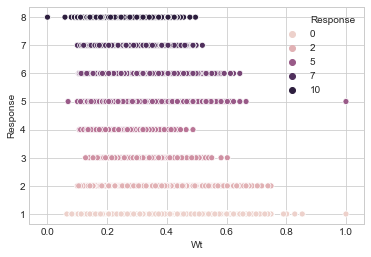

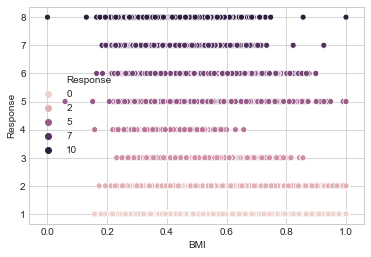

In [0]:
list_continous_variables = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI']

for col in list_continous_variables:
#     sns.scatterplot(x="Response", y=col, hue="Response",data=df_check[df_check['Response'].isin([2, 5])])
    sns.scatterplot(x=col, y="Response", hue="Response",data=df_check)
    plt.show()
    

## Realization => Mistake!!! Step Back :(
## Removing outliers is not a good idea in this dataset. These are probably not outliers as such...because after doing more analysis, we think it's that the data is more spread across
## Instead, remove Wt and Ht....I will keep these for now...but will probably not be used in model
## because BMI is highly correlated with Wt and Ht doesn't give much information
## Unfortunately we can't make BMI categorical here..because data has been provided in normalized form...so we don't have any way to know the actual lowest and highest values....if we had those information, we could make BMI categorical to Low, Normal, High and more using <a href="http://healthyweight.health.gov.au/wps/portal/Home/get-started/are-you-a-healthy-weight/bmi/">This Chart</a>

# Let's generate those datasets...

# Part -1-New....Keep The Null

In [0]:
df_train_1_1 = pd.read_csv('../raw_data/train.csv')

list_sparce_col = ['Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
df_train_1_1.drop(list_sparce_col, axis=1, inplace=True)


# introduce a new column - sum of medical_Keywords
df_train_1_1['Medical_Keyword_SUM'] = df_train_1_1.loc[:, 'Medical_Keyword_1':'Medical_Keyword_48'].sum(axis = 1, skipna = True)
# Drop all medical keyword columns
df_train_1_1.drop(df_train_1_1.columns.to_series()["Medical_Keyword_1":"Medical_Keyword_48"], axis=1, inplace=True)
df_train_1_1.shape


# Product_Info_2 is a non-numeric attribute....
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Product_Info_2 = df_train_1_1['Product_Info_2']
Product_Info_2_encoded = encoder.fit_transform(Product_Info_2)

# let's add this array to dataframe...
df_train_1_1['Product_Info_2_encoded'] = Product_Info_2_encoded

# drop Product_Info_2
df_train_1_1.drop('Product_Info_2', axis=1, inplace=True)
df_train_1_1.head(5)


df_train_1_1.drop('Id', axis=1, inplace=True)
# Drop all sparse cols, drop all null rows, remove outliers, added sum column, removed medical keyword cols
df_train_1_1.to_csv('../partial_data/With_All_Data/train_imbalanced_remove_col.csv', index=False)

print('../partial_data/With_All_Data/train_imbalanced_remove_col.csv has been generated')

../partial_data/With_All_Data/train_imbalanced_remove_col.csv has been generated


In [0]:
#     Employment_Info_1     |cont 
#     Employment_Info_4     |cont
#     Employment_Info_6     |cont
#    Insurance_History_5    |cont   =>too many blank
#       Family_Hist_2       |cont   =>too many blank
#       Family_Hist_3       |cont   =>too many blank
#       Family_Hist_4       |cont   =>too many blank
#       Family_Hist_5       |cont   =>too many blank
#     Medical_History_1     |cat
#    Medical_History_10     |cat   =>too many blank
#    Medical_History_15     |cat   =>too many blank
#    Medical_History_24     |cat   =>too many blank
#    Medical_History_32     |cat   =>too many blank

# Part-2-New....Impute...Mean and Median

                   Training Set Missing data analysis                    
-------------------------------------------------------------------------
    Employment_Info_1     |     19     | 0.031996766642528755
    Employment_Info_4     |    6779    | 11.41610952998434
    Employment_Info_6     |   10854    | 18.278573954631952
    Medical_History_1     |    8889    | 14.969434667654639


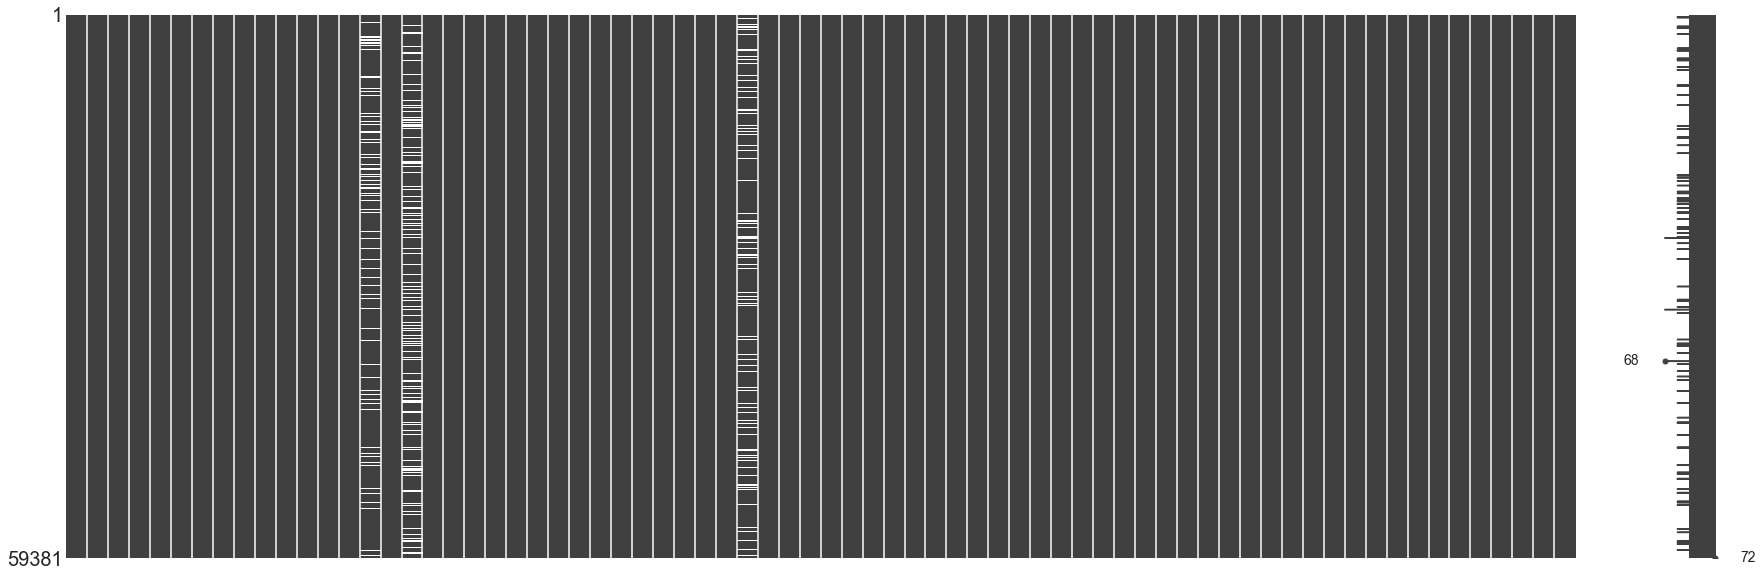

                   Training Set Missing data analysis                    
-------------------------------------------------------------------------


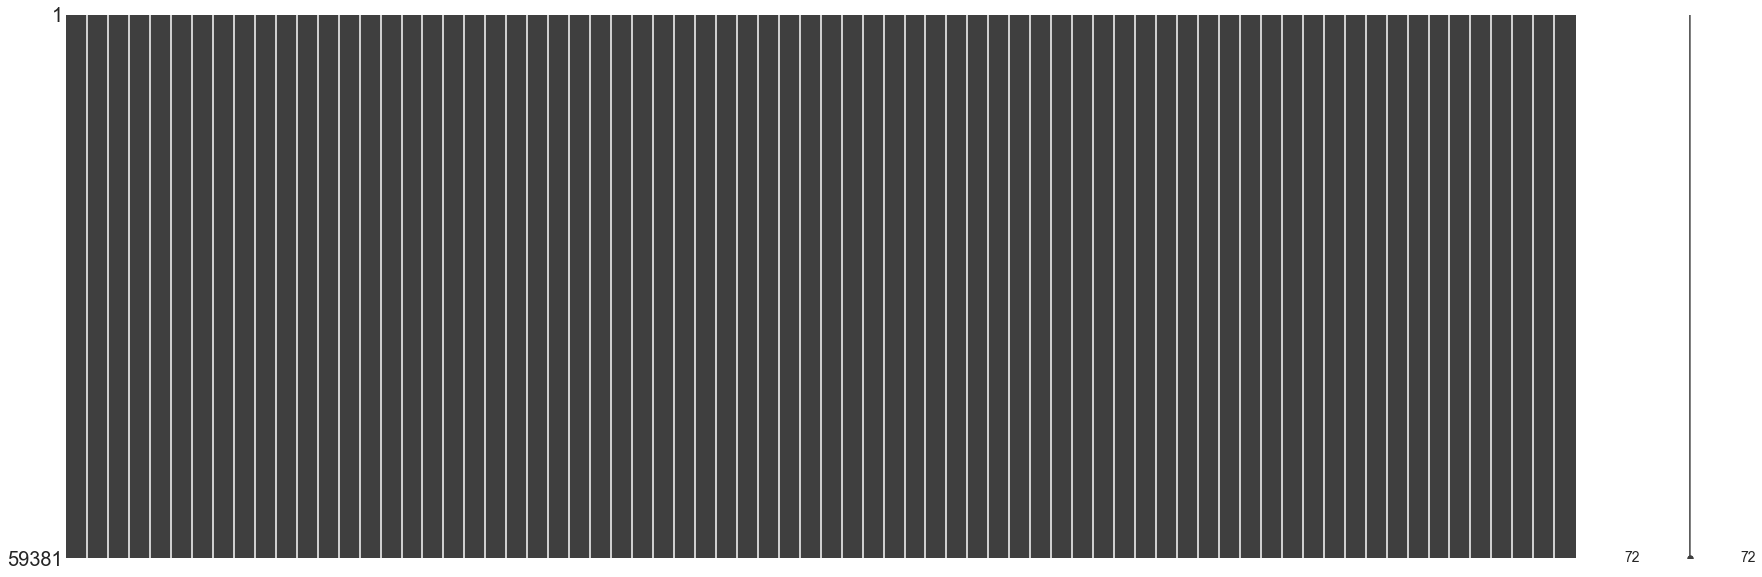

../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean.csv has been generated


(59381, 71)

In [0]:
df_train_2_1 = pd.read_csv('../raw_data/train.csv') 
list_sparce_col = ['Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5',\
                   'Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
df_train_2_1.drop(list_sparce_col, axis=1, inplace=True)


# introduce a new column - sum of medical_Keywords, Drop all medical keyword columns
df_train_2_1['Medical_Keyword_SUM'] = df_train_2_1.loc[:, 'Medical_Keyword_1':'Medical_Keyword_48'].sum(axis = 1, skipna = True)
df_train_2_1.drop(df_train_2_1.columns.to_series()["Medical_Keyword_1":"Medical_Keyword_48"], axis=1, inplace=True)

# Product_Info_2 is a non-numeric attribute....
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Product_Info_2 = df_train_2_1['Product_Info_2']
Product_Info_2_encoded = encoder.fit_transform(Product_Info_2)

# let's add this array to dataframe...
df_train_2_1['Product_Info_2_encoded'] = Product_Info_2_encoded

# drop Product_Info_2
df_train_2_1.drop('Product_Info_2', axis=1, inplace=True)
df_train_2_1.head(5)

# Impute...before that let's visualize once..
print("{:^73}".format("Training Set Missing data analysis") + '\n' + '-' * 73)
list_missing_train = []
for i, v in df_train_2_1.isnull().sum().items():
    if v != 0:
        pct_missing = (v/df_train_2_1.shape[0])*100
        print("{:^25} | {:^10} | {:^16}".format(i, v, pct_missing))
        list_missing_train.append((i,pct_missing))
        

# Plot graphic of missing values
missingno.matrix(df_train_2_1, figsize = (30,10))
plt.show()

# Impute..categorical variables with mode...cont var with mean
df_train_2_1['Medical_History_1'].fillna(df_train_2_1['Medical_History_1'].mode()[0], inplace=True)
df_train_2_1.fillna(df_train_2_1.mean(), inplace=True)

print("{:^73}".format("Training Set Missing data analysis") + '\n' + '-' * 73)
list_missing_train = []
for i, v in df_train_2_1.isnull().sum().items():
    if v != 0:
        pct_missing = (v/df_train_2_1.shape[0])*100
        print("{:^25} | {:^10} | {:^16}".format(i, v, pct_missing))
        list_missing_train.append((i,pct_missing))
        
missingno.matrix(df_train_2_1, figsize = (30,10))
plt.show()
df_train_2_1.drop('Id', axis=1, inplace=True)
df_train_2_1.to_csv('../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean.csv', index=False)
print('../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean.csv has been generated')
df_train_2_1.shape

# Part-3-New...Impute + PCA....
## Wt, BMI 0.85 corr, Ins_Hist_1 vs 8 => 0.79 corr!!!

                   Training Set Missing data analysis                    
-------------------------------------------------------------------------
    Employment_Info_1     |     19     | 0.031996766642528755
    Employment_Info_4     |    6779    | 11.41610952998434
    Employment_Info_6     |   10854    | 18.278573954631952
    Medical_History_1     |    8889    | 14.969434667654639


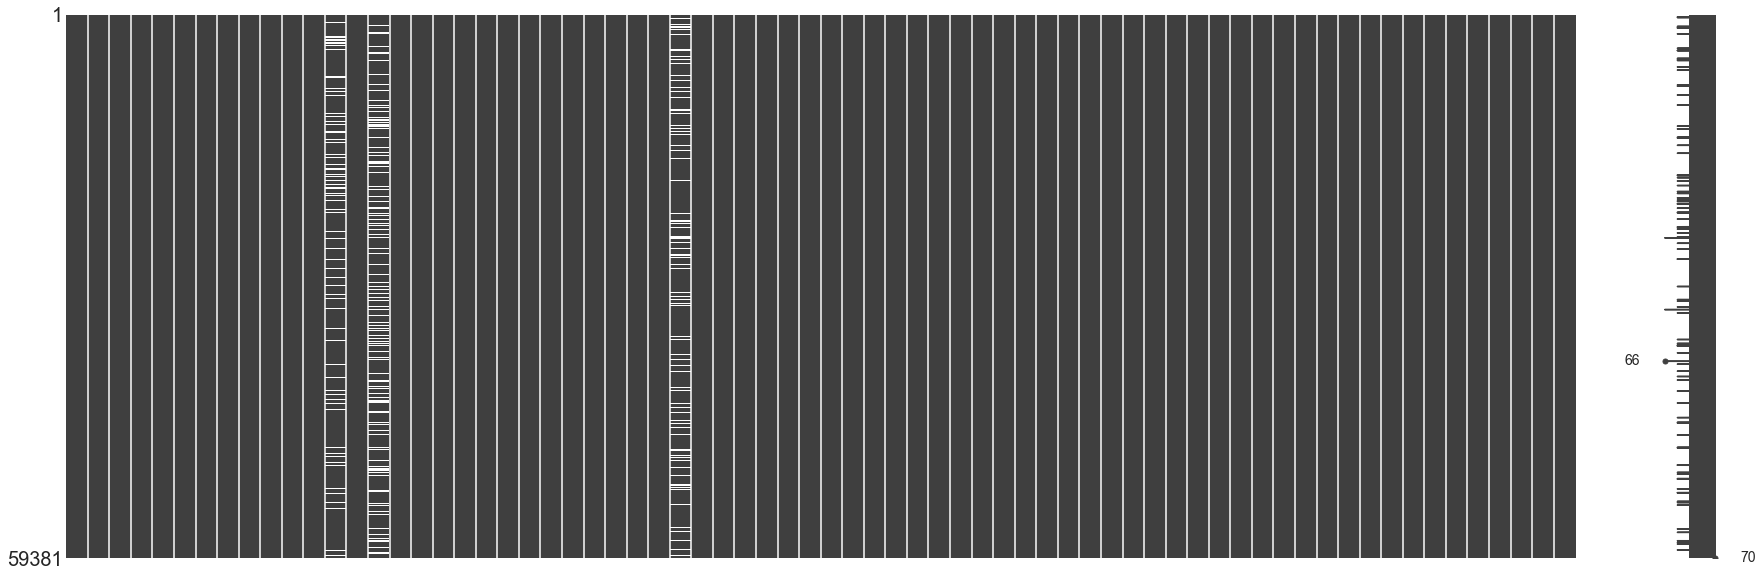

                   Training Set Missing data analysis                    
-------------------------------------------------------------------------


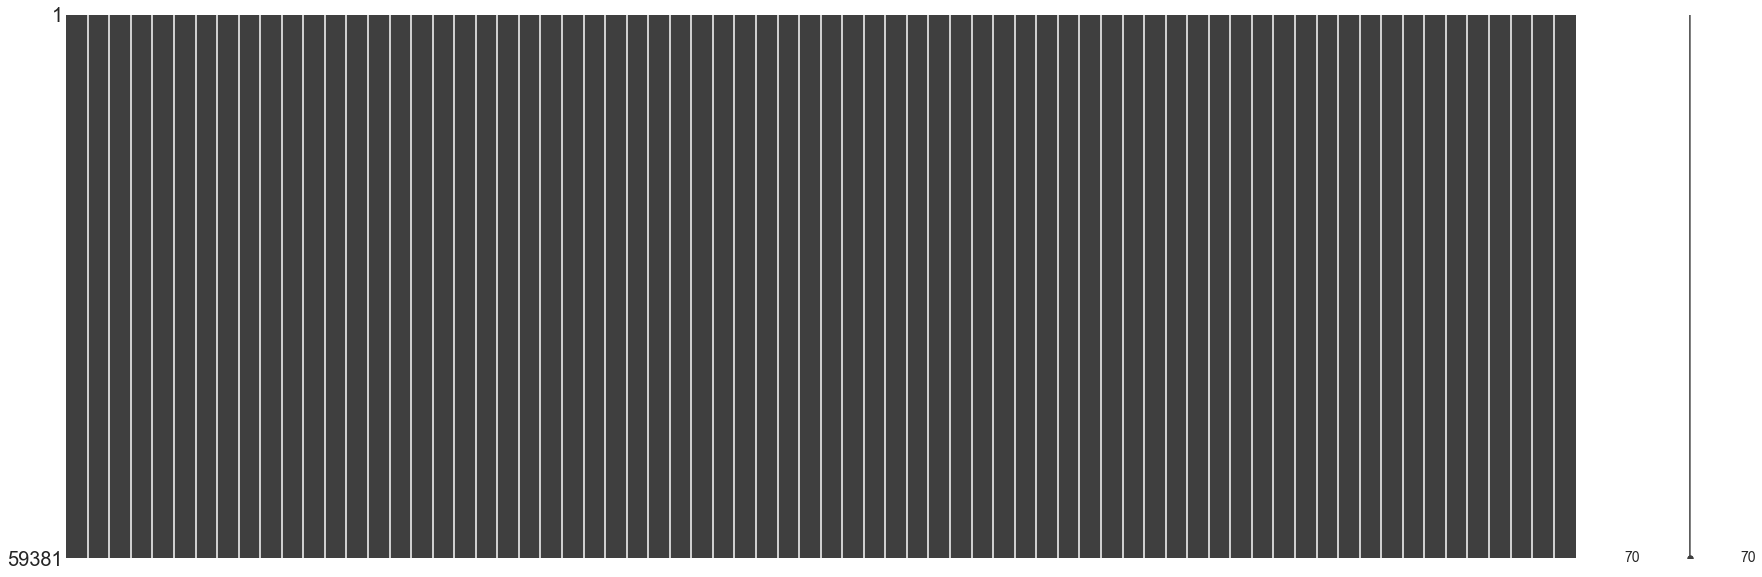

../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean_PCA.csv has been generated


(59381, 69)

In [0]:
# All previous steps + PCA Wt, BMI 0.85 corr, Ins_Hist_1 vs 8 => 0.93 corr!!!

df_train_3_1 = pd.read_csv('../raw_data/train.csv') 
list_sparce_col = ['Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
df_train_3_1.drop(list_sparce_col, axis=1, inplace=True)


df_train_3_1['Medical_Keyword_SUM'] = df_train_3_1.loc[:, 'Medical_Keyword_1':'Medical_Keyword_48'].sum(axis = 1, skipna = True)
df_train_3_1.drop(df_train_3_1.columns.to_series()["Medical_Keyword_1":"Medical_Keyword_48"], axis=1, inplace=True)

# Product_Info_2 is a non-numeric attribute....
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Product_Info_2 = df_train_3_1['Product_Info_2']
Product_Info_2_encoded = encoder.fit_transform(Product_Info_2)

# let's add this array to dataframe...
df_train_3_1['Product_Info_2_encoded'] = Product_Info_2_encoded

# drop Product_Info_2
df_train_3_1.drop('Product_Info_2', axis=1, inplace=True)
df_train_3_1.head(5)

#PCA...Insurance_History_1 and Insurance_History_8 => corr = 0.79....quite high
from sklearn.decomposition import PCA


### Wt BMI
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_3_1[['Wt','BMI']])
df_train_3_1[['Wt_BMI_PCA1','Wt_BMI_PCA2']] = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_train_3_1.drop(['Wt_BMI_PCA2', 'Wt', 'BMI'], axis=1, inplace=True)


### Insurance History
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_3_1[['Insurance_History_1','Insurance_History_8']])
df_train_3_1[['Ins_Hist_PCA1','Ins_Hist_PCA2']] = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_train_3_1.drop(['Ins_Hist_PCA2', 'Insurance_History_1', 'Insurance_History_8'], axis=1, inplace=True)

# Impute...before that let's visualize once..
print("{:^73}".format("Training Set Missing data analysis") + '\n' + '-' * 73)
list_missing_train = []
for i, v in df_train_3_1.isnull().sum().items():
    if v != 0:
        pct_missing = (v/df_train_3_1.shape[0])*100
        print("{:^25} | {:^10} | {:^16}".format(i, v, pct_missing))
        list_missing_train.append((i,pct_missing))
        

# Plot graphic of missing values
missingno.matrix(df_train_3_1, figsize = (30,10))
plt.show()

# Impute..categorical variables with mode...cont var with mean
df_train_3_1['Medical_History_1'].fillna(df_train_3_1['Medical_History_1'].mode()[0], inplace=True)
df_train_3_1.fillna(df_train_3_1.mean(), inplace=True)

print("{:^73}".format("Training Set Missing data analysis") + '\n' + '-' * 73)
list_missing_train = []
for i, v in df_train_3_1.isnull().sum().items():
    if v != 0:
        pct_missing = (v/df_train_3_1.shape[0])*100
        print("{:^25} | {:^10} | {:^16}".format(i, v, pct_missing))
        list_missing_train.append((i,pct_missing))
        
missingno.matrix(df_train_3_1, figsize = (30,10))
plt.show()

df_train_3_1.drop('Id', axis=1, inplace=True)
df_train_3_1.to_csv('../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean_PCA.csv', index=False)
print('../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean_PCA.csv has been generated')
df_train_3_1.shape

# Split train_imbalanced_remove_col_impute_mean.csv in train and test and keep test aside
# We will use the test after we finalize our model to have a final check

In [0]:
from sklearn.model_selection import train_test_split

df_F70 = pd.read_csv('../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean.csv')
print(df_F70.shape)


X_train, X_test, y_train, y_test = train_test_split(df_F70.drop(['Response'], axis = 1), df_F70.Response,\
                                                    test_size=0.2, stratify=df_F70.Response, random_state=42)

df_F70_train = pd.concat([X_train, y_train], axis=1, sort=False) #np.concatenate((X_train, y_train), axis=1),
print(df_F70_train.shape)
df_F70_train.to_csv('../final_data/F70_train.csv', index=False)

df_F70_test = pd.concat([X_test, y_test], axis=1, sort=False) #np.concatenate((X_train, y_train), axis=1)
print(df_F70_test.shape)
df_F70_test.to_csv('../final_data/F70_test.csv', index=False)

(59381, 71)
(47504, 71)
(11877, 71)


# Start Balancing
<h4>before balancing<br>balance<br>after balancing</h4>

Checking ../partial_data/With_All_Data/train_imbalanced_remove_col.csv
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


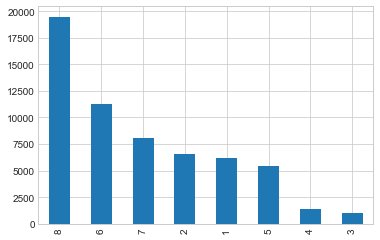

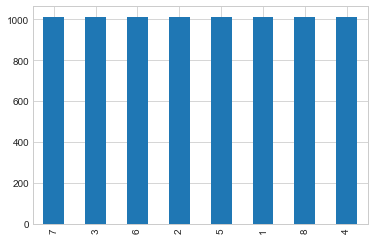

../partial_data/train_balanced_remove_col.csv has been generated...
(8104, 71)
Checking ../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean.csv
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


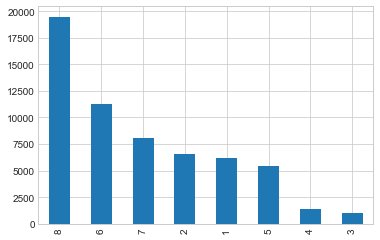

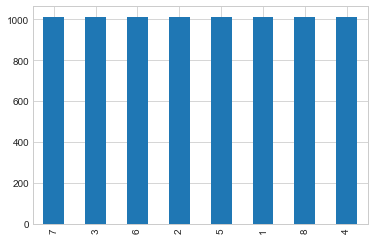

../partial_data/train_balanced_remove_col_impute_mean.csv has been generated...
(8104, 71)
Checking ../partial_data/With_All_Data/train_imbalanced_remove_col_impute_mean_PCA.csv
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


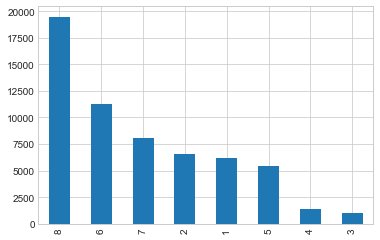

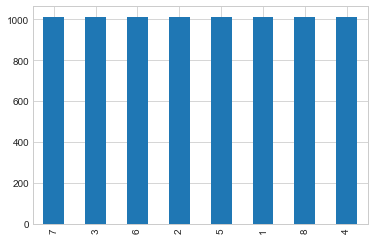

../partial_data/train_balanced_remove_col_impute_mean_PCA.csv has been generated...
(8104, 69)


In [0]:
from os import listdir
from os.path import isfile, join

newFilepath = '../partial_data/With_All_Data'
newfiles = [f for f in listdir(newFilepath) if isfile(join(newFilepath, f))]

# N is min count of response class...response=3 has min count of 1013...
N = 1013
for file in newfiles:
    absolute_filePath = newFilepath + '/' + file
    print(f'Checking {absolute_filePath}')
    df = pd.read_csv(absolute_filePath)
    print(df.Response.value_counts())
    df.Response.value_counts().plot(kind="bar")
    plt.show()
    shuffled_df = df.sample(frac=1,random_state=4)

    # our min count is 1013....so we randomly select 1013 data points for each response class and concat to a dataframe
    N = 1013
    df_under_sampled = shuffled_df.loc[shuffled_df['Response'] == 3]
    for r in sorted(df.Response.unique()):
        if r != 3:
            new_df = shuffled_df.loc[shuffled_df['Response'] == r].sample(n=N,random_state=42)
            df_under_sampled = pd.concat([df_under_sampled, new_df])


    #plot the dataset after the undersampling
    df_under_sampled.Response.value_counts().plot(kind="bar")
    plt.show()

    # save this dataset...
    newFileName = file.replace('imbalanced', 'balanced').replace('F70', 'B70')
    df_under_sampled.to_csv('../partial_data/' + newFileName, index=False)
    print('../partial_data/' + newFileName + ' has been generated...')
    print(df_under_sampled.shape)

### Balance F70_train


8    15591
6     8986
7     6421
2     5242
1     4966
5     4346
4     1142
3      810
Name: Response, dtype: int64


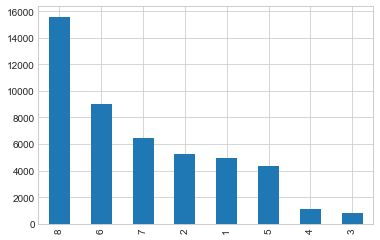

1
2
4
5
6
7
8


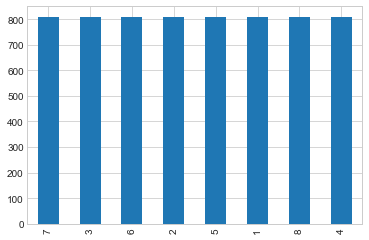

../final_data/B70.csv has been generated...
(6480, 71)


In [0]:
# get distribution on F70_train
print(df_F70_train.Response.value_counts())
df_F70_train.Response.value_counts().plot(kind="bar")
plt.show()


shuffled_df_F70 = df_F70_train.sample(frac=1,random_state=4)

# our min count is 810....so we randomly select 810 data points for each response class and concat to a dataframe
min_count = 810
df_F70_under_sampled = shuffled_df_F70.loc[shuffled_df_F70['Response'] == 3]


for r in sorted(df_F70_train.Response.unique()):
    if r != 3:
        print(r)
        new_df_F70 = shuffled_df_F70.loc[shuffled_df_F70['Response'] == r].sample(n=min_count,random_state=1)
        df_F70_under_sampled = pd.concat([df_F70_under_sampled, new_df_F70])


# plot the dataset after the undersampling
df_F70_under_sampled.Response.value_counts().plot(kind="bar")
plt.show()

# save this dataset...
df_F70_under_sampled.to_csv('../final_data/B70.csv', index=False)
print('../final_data/B70.csv has been generated...')
print(df_F70_under_sampled.shape)

In [0]:
# # Random Oversampling....We don't think we need oversamplig....
# because undersampling also quite a few data...if that doesn't work and we have time, we will do this
# # SMOTEENN
# # SMOTENC

# from imblearn.combine import SMOTEENN

# sme = SMOTEENN(random_state=42)
# X_train_sampled, y_train_sampled = sme.fit_resample(df.drop('Response', axis=1), df['Response'])
# df_sampled_SMOTEENN = pd.concat([pd.DataFrame(X_train_sampled), pd.DataFrame(y_train_sampled)], axis=1)
# # df_sampled_SMOTEENN.columns = df.drop('Response', axis=1).columns.append('Response')

# Feature Selection

#### Feature Selection methods applied:
1. Univariate methods:

    1.1 features with low variance - continuous features
    
    1.2 Univariate feature selection - Chi-Squared test - nominal features
   
2. mutual_info_classif, is suggested to be similar to information gain - nominal features

3. Recursive Feature Elimination using logistic regression for continuous features

4. Filter Method using pearson correlation metric


Reference:https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [0]:
import numpy as np 
import pandas as pd

data_file = 'F70_train'
data = pd.read_csv(f'../final_data/{data_file}.csv')

In [0]:
## Creating a dataframe of feature information

continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
discrete = ['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32', 'Medical_Keyword_SUM']
# Medical_Keyword_1-48 are also discrete
# Remaining features are all nominal

feature_info = pd.DataFrame(columns=['feature', 'type','data_type', 'unique_count', 'percent_missing', 'included'])

data_2 = data.copy()
for col in data.columns:
    col_dtype = data[col].dtypes
    included = True
    if col == 'Id' or col == 'Response':
        feature_type = 'other'
        included = False
    elif col in discrete:
        feature_type = 'discrete'
    elif col[0:15] == "Medical_Keyword" : #Medical_Keyword_1-48 are dummy variables.
        feature_type = 'discrete'
    elif col in continuous:
        feature_type = 'continuous'
    else:
        feature_type = 'nominal'
    
    unique_count = len(data[col].unique())
    percent_missing = round(100 * (data[col].isnull().sum() / len(data.index)), 2)  

    # Pass a series in append() to append a row in dataframe  
    feature_info = feature_info.append(pd.Series([col, feature_type, col_dtype, unique_count, percent_missing, included], index=feature_info.columns ), ignore_index=True)

# Top k features, choose top 6 continuous, top 10 nominal, and remaining discrete after combining medical keywords
top_k_features = [d for d in discrete if d in data_2]

num_nominal = len(feature_info.loc[(feature_info['type'] == 'nominal'), 'feature'])
num_discrete = len(feature_info.loc[(feature_info['type'] == 'discrete'), 'feature'])
num_continuous = len(feature_info.loc[(feature_info['type'] == 'continuous'), 'feature'])
print(f'Nominal: {num_nominal} Discrete: {num_discrete} Continuous: {num_continuous}')

Nominal: 60 Discrete: 2 Continuous: 8


In [0]:
#1.1 features with low variance

continous_features = list(feature_info.loc[(feature_info['type'] == 'continuous') & (feature_info['included']==True), 'feature'] )

X = data_2.loc[:,continous_features].copy()
X.var().sort_values(ascending = False)

Employment_Info_6    0.099875
Product_Info_4       0.079808
Ins_Age              0.038737
BMI                  0.014983
Wt                   0.007970
Employment_Info_1    0.006828
Ht                   0.005520
Employment_Info_4    0.000876
dtype: float64

Since the variance is pretty low for all features, there is no need for dropping low variance features

In [0]:
# 1.2 Univariate feature selection - Chi-Squared test - nominal features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

discrete_features = list(feature_info.loc[(feature_info['type'] == 'discrete'), 'feature'] )
X = data_2.loc[:,discrete_features].copy()
y = data_2.loc[:,'Response'].copy()

feat_selector = SelectKBest(chi2, k='all')
_ = feat_selector.fit(X, y)

feat_scores = pd.DataFrame() 
feat_scores["Attribute"] = X.columns
feat_scores["F-Score"] = feat_selector.scores_
feat_scores["P-Value"] = feat_selector.pvalues_
feat_scores["Support"] = feat_selector.get_support()
#feat_scores["Support"] = X.percent_missing
#print(feature_info[(feature_info['type'] == 'discrete')].head())

feat_scores.sort_values('F-Score', ascending=False).head()
#for fs in feat_scores.sort_values('F-Score', ascending=False):
#    print(fs)

#interpretation:
# p value:
#    The null hypothesis for chi2 test is that "two categorical variables are independent". 
#    So a higher value of chi2 statistic means "two categorical variables are dependent" and MORE USEFUL for classification.
# F score:
#    F-test captures only linear dependency

,Attribute,F-Score,P-Value,Support
1,Medical_Keyword_SUM,9570.648743,0.0,True
0,Medical_History_1,7462.728798,0.0,True


In [0]:
#2 mutual_info_classif

# Estimates mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, 
# which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

nominal_features = list(feature_info.loc[(feature_info['type'] == 'nominal') &\
                                         (feature_info['included']==True), 'feature'] )
X = data_2.loc[:,nominal_features].copy()
y = data_2.loc[:,'Response'].copy()

from sklearn.feature_selection import mutual_info_classif

feat_scores = mutual_info_classif(X, y)

#print the top 10 high-scoring features
print(f'Total nominal features {len(feat_scores)}')
for score, fname in sorted(zip(feat_scores, X.columns), reverse=True)[:30]:
    print(fname,"\t", score)
    top_k_features.append(fname)

Total nominal features 60
Medical_History_23 	 0.08150234478824814
Medical_History_4 	 0.0811477579056521
Product_Info_2_encoded 	 0.07027386453314222
Medical_History_39 	 0.02508577274441981
Medical_History_2 	 0.025031879003841517
InsuredInfo_6 	 0.021339480499743768
Medical_History_6 	 0.01581818206611718
Medical_History_16 	 0.015692721298603995
Insurance_History_2 	 0.01535972303135047
Product_Info_3 	 0.013518840196498072
Medical_History_33 	 0.012843665639717727
Employment_Info_2 	 0.012789499209039601
Medical_History_30 	 0.01273309881906659
Employment_Info_3 	 0.01094021906247633
Medical_History_13 	 0.010913957351643688
Insurance_History_3 	 0.008995380878706882
Medical_History_40 	 0.008968512239275306
InsuredInfo_2 	 0.00885118178478228
InsuredInfo_3 	 0.008814093591327676
InsuredInfo_1 	 0.008726096184341614
Medical_History_29 	 0.00855434113404252
Medical_History_27 	 0.00854991475577993
Medical_History_28 	 0.008463902848235172
Insurance_History_1 	 0.008444019367672695


In [0]:
#3 Recursive Feature Elimination using logistic regression for continuous features

# RFE works by recursively removing attributes and building a model on attributes that remain. 
# It uses model accuracy to identify which attributes (and combinations of attributes) 
# contribute the most to predicting the target attribute.

# an external estimator is used that assigns weights to features 
# using  logistic regression algorithm to select the top

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#applying RFE for continuous attributes:
continuous_features = list(feature_info.loc[(feature_info['type'] == 'continuous') &\
                                         (feature_info['included'] == True), 'feature'] )
X_continuous = data_2.loc[:,continuous_features].copy()
y = data_2.loc[:,'Response'].copy()

# applying to all 8 continuous features to get a ranking
#using the logistic regression model
model = LogisticRegression()
rfe_model = RFE(model, 3)
rfe_feat_selector = rfe_model.fit(X_continuous, y)
feat_ranking = rfe_feat_selector.ranking_

print('Total continuous features: {len(X_continuous.columns)}')
for i in range(len(X_continuous.columns)):
    print(X_continuous.columns[i], "\t", feat_ranking[i])
    top_k_features.append(X_continuous.columns[i])

Total continuous features: {len(X_continuous.columns)}
Product_Info_4 	 3
Ins_Age 	 2
Ht 	 1
Wt 	 1
BMI 	 1
Employment_Info_1 	 4
Employment_Info_4 	 5
Employment_Info_6 	 6


In [0]:
print(f'Number of features: {len(top_k_features)}')
print(top_k_features)

Number of features: 40
['Medical_History_1', 'Medical_Keyword_SUM', 'Medical_History_23', 'Medical_History_4', 'Product_Info_2_encoded', 'Medical_History_39', 'Medical_History_2', 'InsuredInfo_6', 'Medical_History_6', 'Medical_History_16', 'Insurance_History_2', 'Product_Info_3', 'Medical_History_33', 'Employment_Info_2', 'Medical_History_30', 'Employment_Info_3', 'Medical_History_13', 'Insurance_History_3', 'Medical_History_40', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_1', 'Medical_History_29', 'Medical_History_27', 'Medical_History_28', 'Insurance_History_1', 'Family_Hist_1', 'Medical_History_20', 'Medical_History_7', 'Insurance_History_7', 'Medical_History_11', 'Insurance_History_4', 'Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6']


In [0]:
# Create CSV files based on top_k_features
for fname in ['F70_train', 'B70']:
    data_in = pd.read_csv(f'../final_data/{fname}.csv')
    data_out = data_in[top_k_features + ['Response']]
    name_out = fname.replace('_train', '').replace('70', '40')
    data_out.to_csv(f'../final_data/{name_out}.csv', index=False)

In [0]:
end_time = time.time()
print(f'All cells compiled without error...\nTotal time taken: {end_time - start_time} seconds')

All cells compiled without error...
Total time taken: 146.27687287330627 seconds
